# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import 

In [2]:
df = pd.read_csv("/home/chao/Desktop/Ironhack/DB/PS_20174392719_1491204439457_log.csv", nrows = 200000)

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,200000.00000,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,200000.000000,200000.0
mean,10.06589,1.808112e+05,8.821957e+05,9.001938e+05,9.411592e+05,1.191866e+06,0.000735,0.0
std,2.12174,3.291800e+05,2.766264e+06,2.803759e+06,2.373010e+06,2.655236e+06,0.027101,0.0
min,1.00000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.00000,1.201612e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.00000,6.872104e+04,1.951000e+04,0.000000e+00,5.055850e+04,1.320839e+05,0.000000,0.0
75%,12.00000,2.290791e+05,1.915686e+05,2.275212e+05,7.645361e+05,1.189164e+06,0.000000,0.0
max,13.00000,1.000000e+07,3.893942e+07,3.894623e+07,3.903958e+07,3.904248e+07,1.000000,0.0


In [19]:
df.groupby("nameOrig").step.sum().sort_values(ascending = False).head(10)

nameOrig
C745009740     23
C260230637     21
C1709295811    21
C44568807      20
C419691216     13
C566009402     13
C566050128     13
C566062304     13
C72135117      13
C721346767     13
Name: step, dtype: int64

In [20]:
df[df["nameOrig"] == "C745009740" ]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
74821,10,CASH_OUT,41726.55,C745009740,0.0,0.0,C1488712549,54115.86,95842.42,0,0
196159,13,PAYMENT,2745.21,C745009740,0.0,0.0,M1554169249,0.00,0.00,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
step              200000 non-null int64
type              200000 non-null object
amount            200000 non-null float64
nameOrig          200000 non-null object
oldbalanceOrg     200000 non-null float64
newbalanceOrig    200000 non-null float64
nameDest          200000 non-null object
oldbalanceDest    200000 non-null float64
newbalanceDest    200000 non-null float64
isFraud           200000 non-null int64
isFlaggedFraud    200000 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 16.8+ MB


In [6]:
df["isFraud"].value_counts()

0    199853
1       147
Name: isFraud, dtype: int64

In [7]:
df["isFlaggedFraud"].value_counts()

0    200000
Name: isFlaggedFraud, dtype: int64

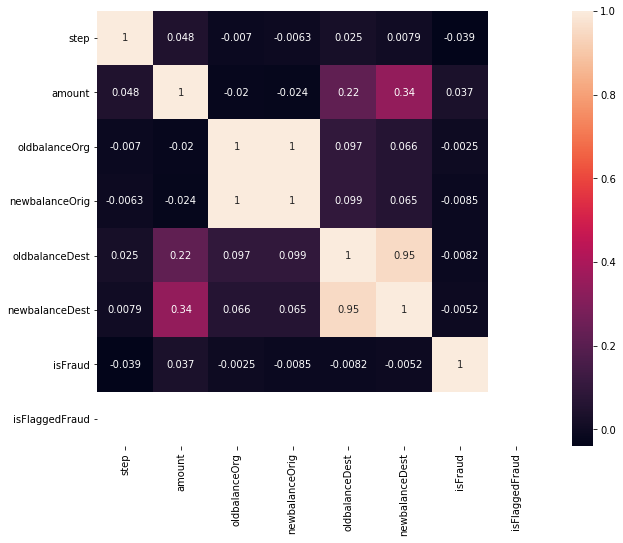

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)

In [21]:
df_dummies = pd.get_dummies(df["type"], drop_first= True)
df = df.join(df_dummies)

In [23]:
df = df.drop(columns = ["type", "nameOrig", "nameDest"])

In [24]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


### What is the distribution of the outcome? 

In [ ]:
# Your response here
# It is a poisson distribution that 

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [25]:
# Your code here
# I am not very sure how to use this variable, I will do nothing first

### Run a logisitc regression classifier and evaluate its accuracy.

In [26]:
# Your code here
X = df.drop(columns = ["isFraud"])
y = df["isFraud"]

from sklearn.preprocessing import scale
X = scale(X)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

In [30]:
%time
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


/home/chao/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[39974     0]
 [   23     3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39974
           1       1.00      0.12      0.21        26

    accuracy                           1.00     40000
   macro avg       1.00      0.56      0.60     40000
weighted avg       1.00      1.00      1.00     40000



### Now pick a model of your choice and evaluate its accuracy.

Using logistic regression but with over sampling

In [33]:
from imblearn import over_sampling
resample = over_sampling.SMOTE(random_state = 87)
x_resample, y_resample = resample.fit_resample(X,y)

Using TensorFlow backend.


In [34]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x_resample, y_resample, test_size=0.2, random_state=87)

In [35]:
clf = LogisticRegression()
clf.fit(X1_train,y1_train)

/home/chao/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y1_pred = clf.predict(X1_test)
print(confusion_matrix(y1_test,y1_pred))
print(classification_report(y1_test,y1_pred))

[[36468  3422]
 [ 3223 36829]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     39890
           1       0.91      0.92      0.92     40052

    accuracy                           0.92     79942
   macro avg       0.92      0.92      0.92     79942
weighted avg       0.92      0.92      0.92     79942



Using random forest regressor

In [37]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state = 87, n_jobs = -1)
RFC.fit(X1_train, y1_train)

/home/chao/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=87, verbose=0,
                       warm_start=False)

In [38]:
y1_pred = RFC.predict(X1_test)
print(confusion_matrix(y1_test,y1_pred))
print(classification_report(y1_test,y1_pred))

[[39852    38]
 [    5 40047]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39890
           1       1.00      1.00      1.00     40052

    accuracy                           1.00     79942
   macro avg       1.00      1.00      1.00     79942
weighted avg       1.00      1.00      1.00     79942



### Which model worked better and how do you know?

In [2]:
# If we only look ar the accuracy, it is easy to be disguised by the high accuracy and thought that the model 
# is doing well. However, to detect fraud is more important than to detect normal transection, therefore I think 
# in the case of fraud, the most important metrics are recalls. By looking at the recall values from above three
# models, we can tell that the logistic regression using original (without oversampling) is not very well preformed.
# While the other two models improved quite a lot after using oversampling.